In [1]:
import os
from os.path import join, dirname
import pandas as pd
import sys

from typing import List, Dict

SOURCE_CODE_PARENT = join(
    dirname(os.getcwd()),
    'src'
)

DATA_PARENT = join(
    dirname(os.getcwd()),
    'data'
)

sys.path.append(SOURCE_CODE_PARENT)

import re
import math
from typing import Dict, List
import pandas as pd

import preprocesser.models as M

from alerts import summarize, preprocess, anomaly, time_series, dataclasses

from collections import defaultdict




preprocesser = M.EN_PreProcesser({'punctuation':True, 'remove_non_alph_char':True,
                                  'replace_at_user':False,
                                #   'remove_tags':False,
                                  'remove_emojis': False
                                #   'remove_numbers': False
                                  })

In [2]:
def load_data(path_name: str) -> pd.DataFrame:

    data = pd.read_csv(f'{path_name}.csv', index_col=0)

    return data

def preprocess_data(data):
    
    # review column names
    data['output_prep'] = data.text.apply(lambda x : preprocesser(x))
    data['prep_text'] = data.output_prep.apply(lambda x : x['text'])

    data.rename(columns={"text": "old_text", "prep_text": "text"}, inplace=True)

    return data

def preprocess_data2(data, column):
    
    # review column names
    data[column] = data[column].apply(lambda x : '' if isinstance(x, float) else x)
    data[column] = data[column].apply(lambda x : preprocesser(x))

    return data


def create_time_series(data):

    if 'date' not in data.columns:
        data['date'] = data['created_at'].apply(lambda x: x[:10]) # localtime or created_at
    
    data_count = preprocess.data2timeSeries(data)

    freq_per_day_df = preprocess.data2timeSeries(data)

    # ts = data_count.loc[:,'text'].values
    dates = data_count.index
    dates = pd.to_datetime(dates)


    timeseries = dataclasses.TimeSeries(
    freq_per_day_df.index.values,
    freq_per_day_df.text.values)


    ts = time_series.AnomalyMeanTS(timeseries)

    return ts, dates, timeseries



In [5]:
name_data = 'Sintomas_intestinales_uruguay'#'immigration_data'#'Congo virus - Pakistan - Data'#'diarrhea_vomit_data'#'20230921_Morocco_Health'#'20230922_Derechos LGTBIQ+'#'20230915_Morocco_Earthquake'#'Sintomas_intestinales_uruguay' '20230915_Morocco_Earthquake' 'Morocco_Earthquake''Libya_flood' 'Diarrhea+Vomit test' 'immigration-ie' 'Congo virus - Pakistan - Data (1)'
data = load_data(join(DATA_PARENT, name_data))

data.head()

,text,created_at,lang,source,name,screen_name,bio,us_created_at,followers_count,friends_count,statuses_count,favourites_count,country,country_code,locality,region,sub_region,coordinates
id,,,,,,,,,,,,,,,,,,
1613402886142308353,"Me acabé de despertar con anciedad, lo único q...",2023-01-12T05:09:58+00:00,es,twitter,L✨,@letiigonzalez17,22 años ❄️ ♍️ virgo,2015-07-17T22:46:12+00:00,177,151,14140,8818,Uruguay,UY,NaN,NaN,NaN,"-33.0, -56.0"
1613399780641611776,Puedo decir que ya recuerdo xq odio fumar cogo...,2023-01-12T04:57:37+00:00,es,twitter,motomami,@candus21,ig : ponny_21_,2013-12-30T01:31:46+00:00,380,686,48696,19649,Uruguay,UY,Montevideo,Montevideo,NaN,"-34.83346, -56.16735"
1613378042029539328,"@soffi_avilaa q asco sofia, me dan nauseas lee...",2023-01-12T03:31:14+00:00,es,twitter,𝒇𝒍𝒐𝒓𝒆𝒏𝒄𝒊𝒂,@flor_rosenberg,ig; floren_rosen07,2021-07-02T04:54:29+00:00,45,43,1313,29637,Uruguay,UY,NaN,Cerro Largo,NaN,"-32.33333, -54.33333"
1613377962828595202,@VanderolaJr Gracias. Si necesito vomitar lo e...,2023-01-12T03:30:56+00:00,es,twitter,Ing. El Herrante (trucho),@el_herrante,Uruguayo.\nDefensor Sporting en todos los depo...,2010-04-09T13:32:06+00:00,2241,2163,62087,110565,Uruguay,UY,NaN,NaN,NaN,"-33.0, -56.0"
1613377512163131395,El destino elegido por los uruguayos: Florianó...,2023-01-12T03:29:08+00:00,es,twitter,EL PAÍS,@elpaisuy,Diario El País de Uruguay. http://elpais.uy/li...,2009-04-15T17:18:57+00:00,834127,669,541454,1959,Uruguay,UY,Montevideo,Montevideo,NaN,"-34.83346, -56.16735"


In [6]:
prep_data = preprocess_data(data)

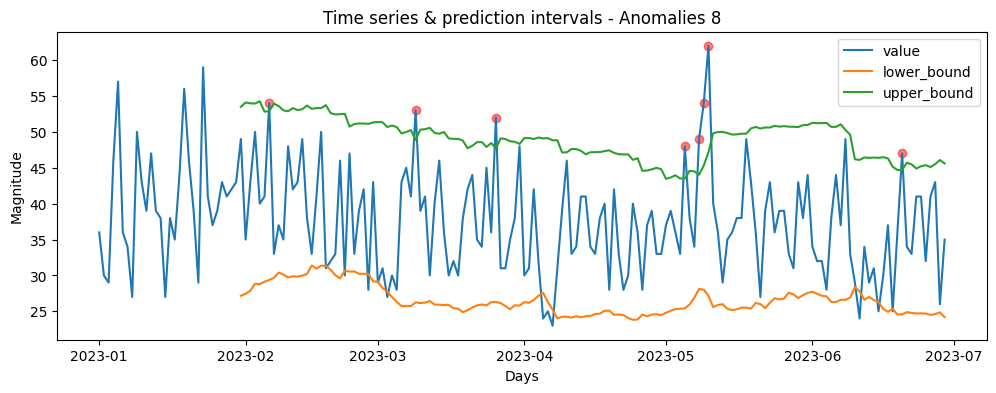

In [7]:
from alerts import plot

ts, dates, timeseries = create_time_series(prep_data)

plot.plot(ts, show_anomalies=True)

In [8]:
from alerts.anomaly import AnomalyDetector

window = 30

def extract_alerts(ts, window):

    intervals = ts.prediction_interval()

    df = pd.DataFrame([p.__dict__ for p in intervals])
    ts_volumes = list(df.value)
    ts_dates = list(df.date)
    ts_lw_bound = list(df.lower_bound)
    ts_up_bound = list(df.upper_bound)

    detector = AnomalyDetector()
    events = detector.detect_alerts(ts)

    anomaly_dates = [e.date for e in events]
    anomaly_volumes = [e.value for e in events]

    results = [{'date':pd.Timestamp(date), 'volume':volume} for date, volume in zip(anomaly_dates, anomaly_volumes)]
    intervals = {'dates': ts_dates, 'lower_bound': ts_lw_bound, 'upper_bound': ts_up_bound}

    return results, anomaly_dates, anomaly_volumes, intervals, ts_volumes



results, anomaly_dates, anomaly_volumes, intervals, ts_volumes = extract_alerts(ts, window=window)
results

[{'date': Timestamp('2023-02-06 00:00:00'), 'volume': 54},
 {'date': Timestamp('2023-03-09 00:00:00'), 'volume': 53},
 {'date': Timestamp('2023-03-26 00:00:00'), 'volume': 52},
 {'date': Timestamp('2023-05-05 00:00:00'), 'volume': 48},
 {'date': Timestamp('2023-05-08 00:00:00'), 'volume': 49},
 {'date': Timestamp('2023-05-09 00:00:00'), 'volume': 54},
 {'date': Timestamp('2023-05-10 00:00:00'), 'volume': 62},
 {'date': Timestamp('2023-06-20 00:00:00'), 'volume': 47}]

In [12]:
from datetime import datetime, timedelta


def time_proximity_criterion(anomaly1, anomaly2):

    date1 = anomaly1['date']
    date2 = anomaly2['date']

    time_proximity_threshold = timedelta(days=5)

    return abs(date1 - date2) <= time_proximity_threshold



In [13]:
def group_anomalies(anomaly_results: List[Dict[str, int]], grouping_criterion):
    grouped_intervals = []

    for i, anomaly in enumerate(anomaly_results):
        current_group = [anomaly]

        for j in range(i + 1, len(anomaly_results)):
            if grouping_criterion(anomaly, anomaly_results[j]):
                current_group.append(anomaly_results[j])
            else:
                break

        grouped_intervals.append(current_group)

    # Remove duplicates; keep the largest group
    unique_intervals = []
    for group in grouped_intervals:
        if not any(set(frozenset(point.items()) for point in group) <= set(frozenset(existing_point.items()) for existing_group in unique_intervals for existing_point in existing_group) for existing_group in unique_intervals):
            unique_intervals.append(group)

    return unique_intervals


In [14]:
grouped_intervals = group_anomalies(results, time_proximity_criterion)


In [15]:
grouped_intervals

[[{'date': Timestamp('2023-02-06 00:00:00'), 'volume': 54}],
 [{'date': Timestamp('2023-03-09 00:00:00'), 'volume': 53}],
 [{'date': Timestamp('2023-03-26 00:00:00'), 'volume': 52}],
 [{'date': Timestamp('2023-05-05 00:00:00'), 'volume': 48},
  {'date': Timestamp('2023-05-08 00:00:00'), 'volume': 49},
  {'date': Timestamp('2023-05-09 00:00:00'), 'volume': 54},
  {'date': Timestamp('2023-05-10 00:00:00'), 'volume': 62}],
 [{'date': Timestamp('2023-06-20 00:00:00'), 'volume': 47}]]

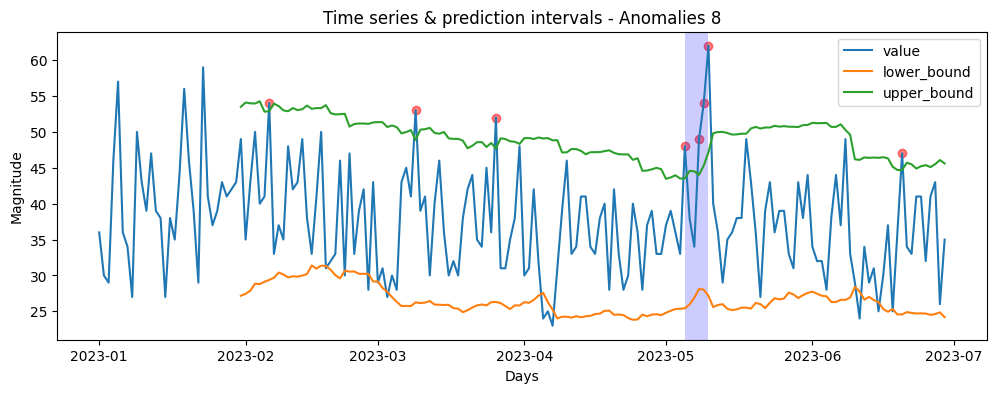

In [19]:
plot.plot_groups(ts, show_anomalies=True)